In [ ]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16000, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 16000 (delta 20), reused 19 (delta 12), pack-reused 15967
Receiving objects: 100% (16000/16000), 14.66 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (10986/10986), done.
/content/yolov5


In [ ]:
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.6/615.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import torch
import os
from IPython.display import Image, clear_output  # to display images

In [ ]:
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="081E2h5x03wwTzg1Omep")
project = rf.workspace().project("road-turn-detections")
dataset = project.version(2).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Turn-Detections-2 in yolov5pytorch:: 100%|██████████| 202/202 [00:00<00:00, 6362.12it/s]


In [ ]:
# Train the YOLOv5 model
!python train.py --img 640 --epochs 120 --data {dataset.location}/data.yaml --weights yolov5s.pt


train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Road-Turn-Detections-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=120, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-225-gbb9706e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
# Run object detection on a validation dataset and save the detected images
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.15 --source {dataset.location}/valid/images --save-txt --save-conf --save-crop



detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/Road-Turn-Detections-2/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.15, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-225-gbb9706e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/19 /content/yolov5/Road-Turn-Detections-2/valid/images/IMG_8717_JPG.rf.f9aa82f66b0e7eeb3702a60d01f4ce75.jpg: 640x640 1 Right-Turn, 2 straights, 11.5ms
image 2/19 /content/yolov5/Road-Turn-Detections-2/valid/images/IMG_8730_JPG.rf.e3255e0ad906a8eec18eb4d94d44818f.jpg: 640x640 1 straight, 11.5m

In [ ]:
# Create a directory to store the detected images
detected = "/content/drive/MyDrive/yolov5"
os.makedirs(detected, exist_ok=True)

In [ ]:
# Move the detected images to the detected directory
!mv runs/detect/exp/* {detected}

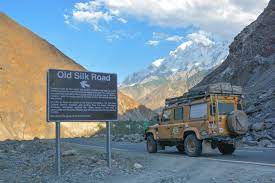

In [15]:
# Displaying unexpected image
display(Image(filename=f'{detected}/content/drive/MyDrive/object detection/un6.jpg'))

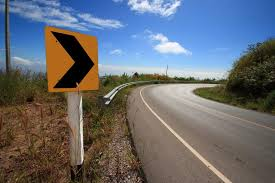

In [11]:
# Displaying right turn detected image
display(Image(filename=f'{detected}IMG_8717_JPG.rf.f9aa82f66b0e7eeb3702a60d01f4ce75.jpg'))